# 📦 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# 📂 Load Data

In [2]:
benin_df = pd.read_csv('../data/raw/benin-malanville.csv', parse_dates=['Timestamp'])

# 🧭 Overview

In [3]:

print("🔹 Data Shape:", benin_df.shape)
print("🔹 Columns:", benin_df.columns.tolist())
display(benin_df.head())

🔹 Data Shape: (525600, 19)
🔹 Columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


# 📊 Summary Statistics

In [4]:

display(benin_df.describe())

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN


# 🧼 Missing Values

In [5]:

missing = benin_df.isna().sum()
missing_percent = benin_df.isna().mean() * 100
print("Missing Value Summary:")
print(missing[missing > 0])
print("\n❗Columns with >5% missing:")
print(missing_percent[missing_percent > 5])

Missing Value Summary:
Comments    525600
dtype: int64

❗Columns with >5% missing:
Comments    100.0
dtype: float64


# 🚨 Outlier Detection


In [6]:

columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = benin_df[columns_to_check].apply(zscore)
outliers = (np.abs(z_scores) > 3).any(axis=1)
print(f"⚠️ Outlier rows count: {outliers.sum()}")

⚠️ Outlier rows count: 7740


# 🔧 Cleaning: Fill missing with median

In [7]:

benin_df[columns_to_check] = benin_df[columns_to_check].fillna(benin_df[columns_to_check].median())

# 💾 Save Cleaned Data (excluded from git)

In [23]:

benin_df.to_csv('../data/processed/benin_clean.csv', index=False)

# 🕒 Time Series Analysis

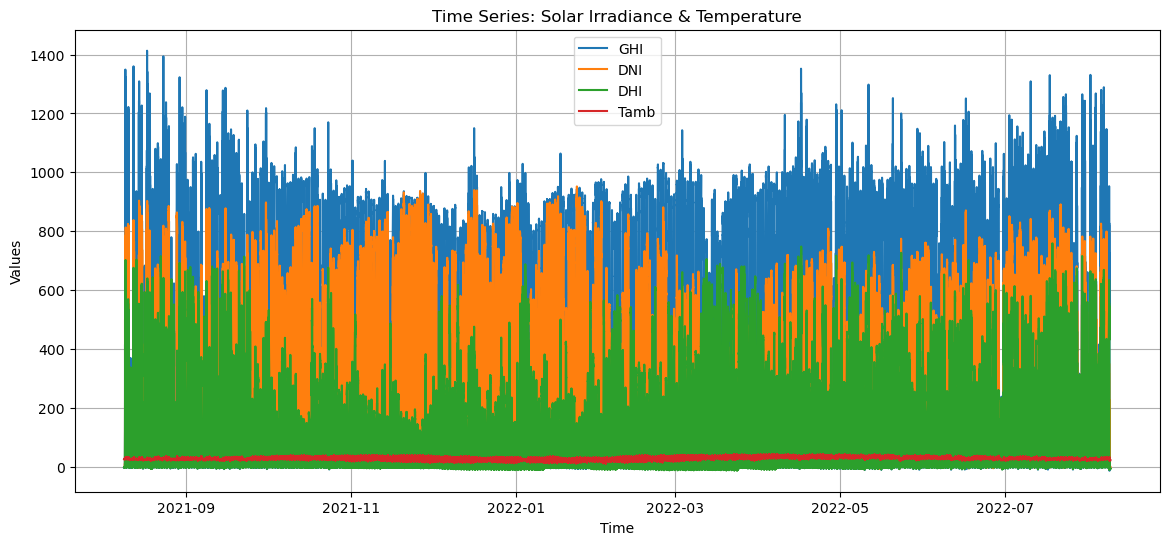

In [24]:
time_cols = ['GHI', 'DNI', 'DHI', 'Tamb']
plt.figure(figsize=(14, 6))
for col in time_cols:
    plt.plot(benin_df['Timestamp'], benin_df[col], label=col)
plt.legend()
plt.title('Time Series: Solar Irradiance & Temperature')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# 🧽 Cleaning Effect


Text(0, 0.5, 'Average Reading')

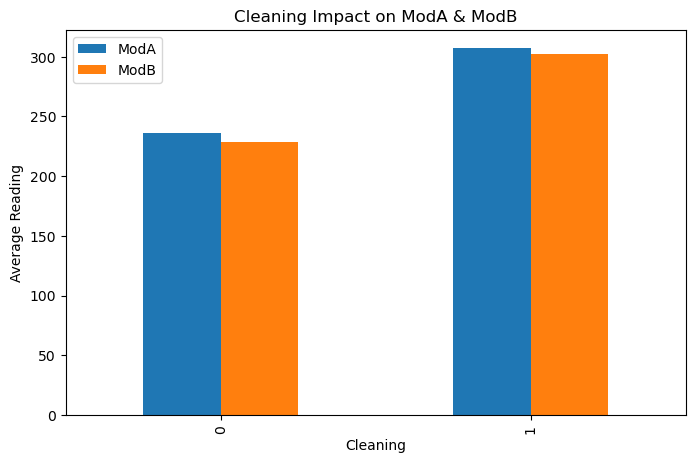

In [16]:
benin_df['Cleaning'] = benin_df['Cleaning'].astype(int)
cleaning_avg = benin_df.groupby('Cleaning')[['ModA', 'ModB']].mean()
cleaning_avg.plot(kind='bar', title='Cleaning Impact on ModA & ModB', figsize=(8, 5))
plt.ylabel('Average Reading')

# 🔗 Correlation Heatmap


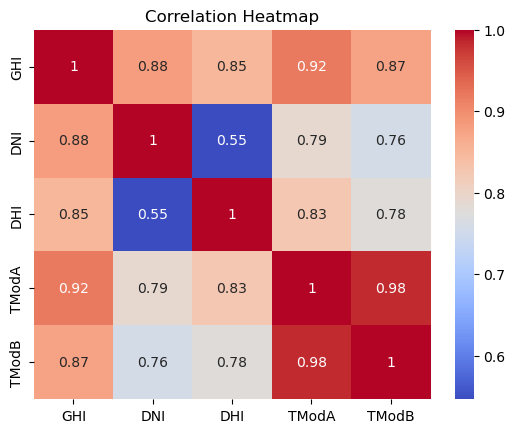

In [17]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
sns.heatmap(benin_df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 🌬️ Wind vs GHI


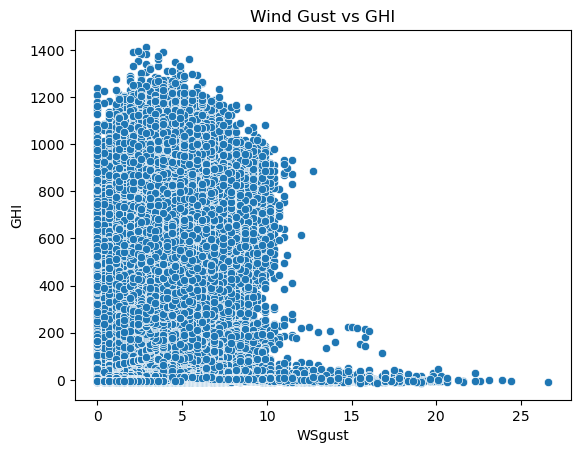

In [18]:
sns.scatterplot(x='WSgust', y='GHI', data=benin_df)
plt.title('Wind Gust vs GHI')
plt.show()

# 💧 Humidity vs Temperature & GHI


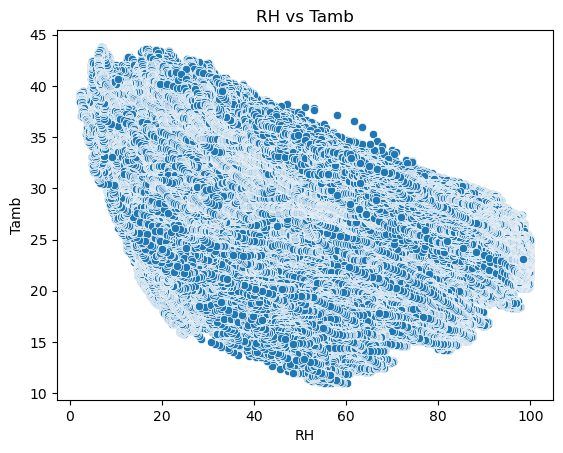

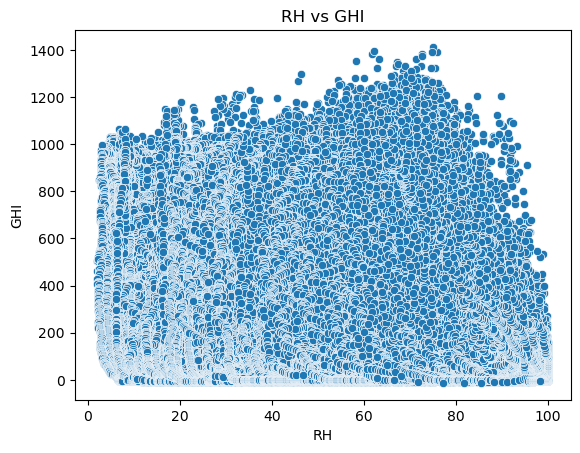

In [19]:
sns.scatterplot(x='RH', y='Tamb', data=benin_df)
plt.title('RH vs Tamb')
plt.show()

sns.scatterplot(x='RH', y='GHI', data=benin_df)
plt.title('RH vs GHI')
plt.show()

# 📊 Histograms

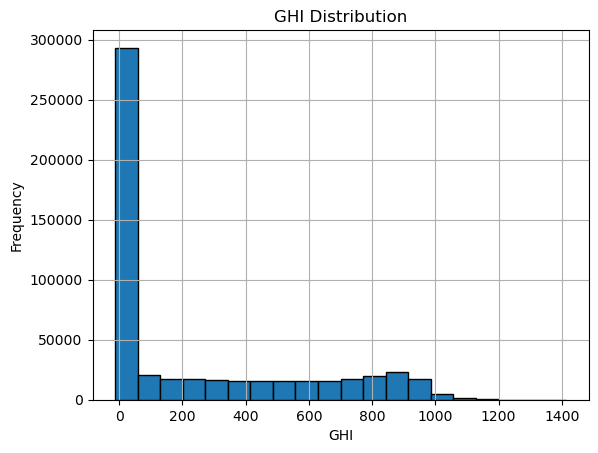

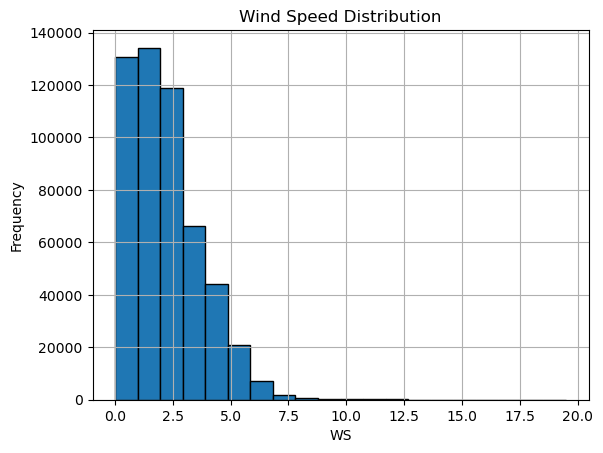

In [20]:

benin_df['GHI'].hist(bins=20, edgecolor='black')
plt.title('GHI Distribution')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()

benin_df['WS'].hist(bins=20, edgecolor='black')
plt.title('Wind Speed Distribution')
plt.xlabel('WS')
plt.ylabel('Frequency')
plt.show()

# 🔵 Bubble Chart: GHI vs Tamb

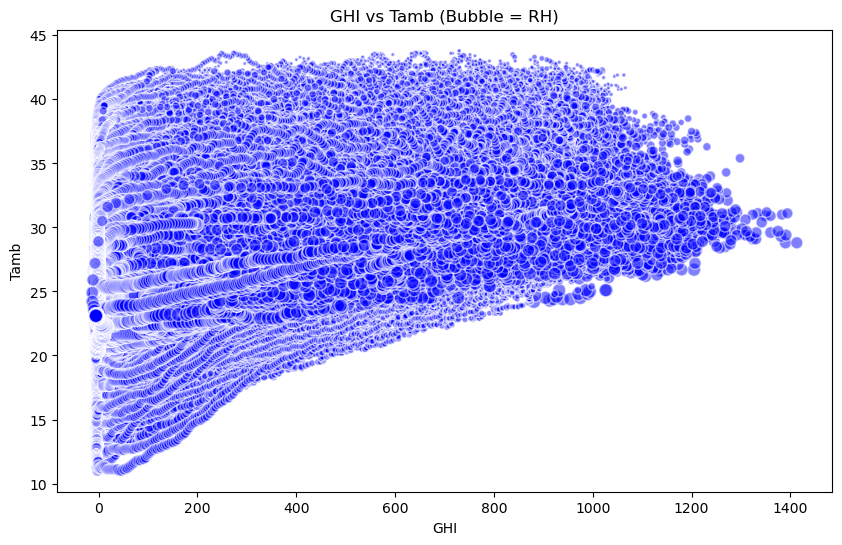

In [26]:

plt.figure(figsize=(10, 6))
plt.scatter(benin_df['GHI'], benin_df['Tamb'], s=benin_df['RH'], alpha=0.5, c='blue', edgecolors='w')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb (Bubble = RH)')
plt.show()